## Steepest Descent Algorithm with Backtracking

I'll begin by typing down and vizualizing the function:

$$
f(x) = (1-x_{1})^2 + (x_{2}-x_{1}^2)^2 
$$

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


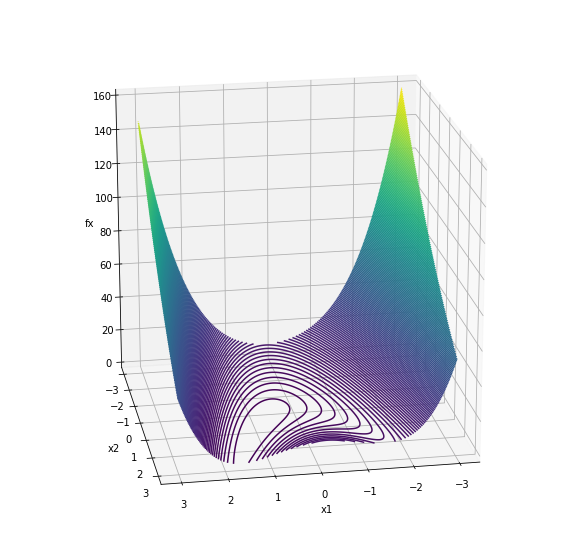

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-3,3,num=1000)
x2 = np.linspace(-3,3,num=1000)

def f(x1, x2):
    return (1-x1)**2+(x2-x1**2)**2

X, Y = np.meshgrid(x1, x2)
fx = f(X,Y)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.view_init(20, 80)
ax.contour3D(X, Y, fx, 200, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('fx');

### Now we define a function to compute the numerical gradient:

In [6]:
def f(x):
    return (1-x[0])**2+(x[1]-x[0]**2)**2

def grad(x,f,h=0.00001):
  grad = np.zeros((x.shape))
  for i in range(x.shape[0]):
    h_vec = np.zeros((x.shape))
    h_vec[i] = h
    grad[i] = (f(x+h_vec)-f(x))/h

  return grad

### Next we define some variables in our problem:

$c_1 = 0.1$

$\eta = 0.5$

$\text{tolerance: } 0.000001$

### Next we implement a nested while loop (while loop within a while loop), the outer loop, which does the gradient descent, functions as long as the difference in the function's value at two consecutive steps is greater than the proposed tolerance, or as long as the number of iterations carried out is less than the proposed maximum number of iterations of 100. 

###This outer loop uses the identity:

$$
x_{next} = x_{current}-\eta\nabla f(x_{k}) 
$$

###The inner loop on the other hand, acts to shrink $\eta$ in each step as long as the inequality 
$$
f(x_{current}-\eta\nabla f(x_{k}) )> f(x_{current})-c_1\eta||\nabla f(x_{k})||^2 
$$ 

###holds true.

In [8]:
max_iter = 100 # setting maximum number of iterations
iter = 1 # initializing iteration counter
x1_old, x2_old = -1.2, 1.0 # starting point for x_1 and x_2
x_old = np.vstack((x1_old, x2_old)) # reformatting into a 2x1 array
x1_new, x2_new = 0, 0 # initializing placeholder for next iteration coordinates
x_new = np.vstack((x1_new, x2_new)) # reformatting into a 2x1 array
c1 = 0.1 # setting value for c_1
eta = 0.5 # setting starting value for eta
tol = 1e-6 # setting tolerance
gamma = 0.5 # setting shrinkage factor for eta

while (iter < max_iter) and ((f(x_old)-f(x_new)) > tol): # first while loop with two conditions
  #print(grad(x_old,f))

  x_old = x_new.copy() # updating current point
  eta = eta_0 # resetting eta to its starting value (otherwise adaptive step size will only rely on first step)

  # next line print iteration number
  if iter % 5 == 0:
    print('iteration '+str(iter))
    pass
  elif iter == 1:
    print('iteration '+str(iter))
  else:
    pass
  
  # Second while loop for shrinking eta
  while (f(x_old-eta*grad(x_old,f)) > f(x_old)-c1*eta*np.linalg.norm(grad(x_old,f))**2):
    eta = gamma*eta
    #print(eta)

  # finding new point
  x_new = x_old - eta*grad(x_old,f)

  # increasing iterations by 1
  iter+=1

print(f"Solution value is {np.round(f(x_new)[0],2)}. This occurs at the point ({np.round(x_new[0],2)},{np.round(x_new[1],2)}).")

iteration 1
iteration 5
iteration 10
iteration 15
iteration 20
iteration 25
iteration 30
iteration 35
iteration 40
iteration 45
iteration 50
iteration 55
Solution value is 0.0. This occurs at the point ([1.],[0.99]).


### The obtained solution matches the expected analytical solution, however the number of iterations taken was greater than expected.